# SelectPercentile 單變數特徵選取(Univariate feature selection)

## 載入相關套件

In [1]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectPercentile, chi2

## 載入資料集

In [2]:
X, y = datasets.load_digits(return_X_y=True)
X.shape

(1797, 64)

## SelectPercentile 特徵選取

In [3]:
clf = SelectPercentile(chi2, percentile=10)
X_new = clf.fit_transform(X, y)
X_new.shape

(1797, 7)

In [4]:
# 顯示特徵分數
clf.scores_

array([          nan,  811.90700411, 3501.28249552,  698.9252572 ,
        438.52969882, 3879.81925999, 3969.45823205, 1193.5608181 ,
         24.79521396, 2953.83108764, 2583.65198939,  388.24205944,
        824.69094853, 3676.48924765, 1983.5796061 ,  597.24198237,
          8.95886124, 1924.21690377, 2409.27140681, 3556.31594594,
       4871.94194551, 4782.19921618, 2155.17378998,  376.76583333,
          7.90090158, 2471.82418401, 4515.48149826, 2986.64314847,
       3724.09567634, 3208.64686641, 5138.07412439,   35.71270718,
                 nan, 5688.25079535, 5262.46646904, 3165.0605867 ,
       3231.63943369, 2532.99695611, 3288.81403655,           nan,
        142.85082873, 3863.85787901, 6416.0867248 , 5448.25154235,
       4079.73153383, 2134.02540236, 4486.34097862,  313.53898127,
         70.39927392,  449.72327313, 2801.97224468, 1527.54519627,
       1653.15892311, 3073.99803898, 5251.21748723,  683.88227339,
          9.15254237,  851.06791492, 3800.2473108 ,  730.92975

In [5]:
# 顯示 p value
clf.pvalues_

array([            nan, 5.81310493e-169, 0.00000000e+000, 1.17740541e-144,
       8.11314242e-089, 0.00000000e+000, 0.00000000e+000, 2.97727113e-251,
       3.20626273e-003, 0.00000000e+000, 0.00000000e+000, 4.41344943e-078,
       1.02825052e-171, 0.00000000e+000, 0.00000000e+000, 8.18335060e-123,
       4.41080315e-001, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 1.23435651e-075,
       5.44163062e-001, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 4.45801029e-005,
                   nan, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000,             nan,
       2.65875300e-026, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 3.49452723e-062,
       1.27145348e-011, 3.28604761e-091, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0

## 3. 不須進行特徵工程

## 4. 資料分割

In [7]:
# 選擇部份特徵
X = X_new

# 資料分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

# 查看陣列維度
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1437, 7), (360, 7), (1437,), (360,))

## 特徵縮放

In [8]:
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

## 5. 選擇演算法

In [9]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

## 6. 模型訓練

In [10]:
clf.fit(X_train_std, y_train)

LogisticRegression()

## 7. 模型計分

In [11]:
y_pred = clf.predict(X_test_std)
y_pred

array([6, 6, 4, 2, 3, 0, 4, 1, 4, 8, 4, 9, 6, 9, 6, 2, 9, 6, 2, 9, 5, 0,
       7, 5, 3, 2, 2, 2, 8, 7, 0, 2, 9, 7, 8, 1, 6, 6, 5, 6, 0, 5, 0, 8,
       5, 6, 4, 9, 4, 0, 3, 9, 3, 4, 5, 9, 5, 5, 5, 5, 2, 1, 2, 3, 0, 8,
       2, 0, 5, 8, 1, 0, 7, 4, 2, 6, 8, 0, 5, 3, 8, 3, 6, 7, 0, 5, 4, 4,
       8, 3, 0, 9, 0, 0, 2, 6, 7, 6, 3, 8, 3, 8, 3, 0, 0, 6, 4, 9, 8, 2,
       0, 5, 4, 7, 4, 8, 4, 8, 9, 9, 7, 8, 0, 9, 9, 1, 1, 4, 3, 9, 8, 2,
       4, 0, 6, 4, 5, 9, 7, 2, 6, 1, 2, 0, 8, 2, 1, 7, 0, 6, 8, 0, 5, 2,
       2, 4, 6, 8, 5, 8, 0, 3, 7, 3, 7, 5, 9, 1, 8, 7, 9, 4, 0, 6, 6, 3,
       8, 1, 9, 7, 7, 3, 2, 4, 8, 3, 7, 2, 4, 9, 4, 0, 5, 6, 4, 1, 4, 6,
       9, 0, 7, 3, 0, 4, 3, 8, 3, 6, 1, 9, 1, 1, 7, 2, 5, 3, 5, 4, 3, 4,
       8, 3, 3, 8, 2, 1, 3, 7, 0, 3, 3, 8, 4, 2, 6, 9, 5, 1, 0, 2, 9, 7,
       6, 3, 0, 3, 9, 0, 7, 8, 1, 9, 3, 8, 8, 4, 0, 4, 1, 2, 5, 5, 2, 6,
       9, 8, 1, 1, 3, 9, 8, 3, 2, 4, 9, 2, 8, 0, 3, 0, 9, 7, 8, 2, 2, 1,
       4, 0, 6, 0, 3, 0, 5, 3, 9, 8, 0, 7, 8, 9, 2,

In [12]:
# 計算準確率
print(f'{accuracy_score(y_test, y_pred)*100:.2f}%') 

71.94%


In [13]:
# 混淆矩陣
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[33  1  0  0  0  0  0  0  1  0]
 [ 0 13  4  2  4  4  1  1  5  2]
 [ 0  2 23  1  0  0  0  0  0  1]
 [ 0  1  0 28  0  2  0  0  1  1]
 [ 1  5  0  0 30  0  0  1  0  0]
 [ 1  7  0  8  1 16  0  0  0  1]
 [ 3  0  1  0  0  0 32  0  1  0]
 [ 2  3  3  0  5  2  0 24  4  0]
 [ 0  2  4  1  0  0  1  2 30  2]
 [ 0  0  1  2  0  3  0  0  0 30]]


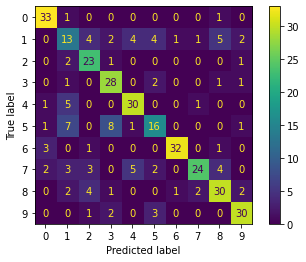

In [15]:
# 混淆矩陣圖
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred))
disp.plot()
plt.show()

## 使用全部特徵

In [18]:
# 載入資料集
X, y = datasets.load_digits(return_X_y=True)

# 資料分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

# 查看陣列維度
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# 特徵縮放
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

# 模型訓練
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train_std, y_train)

# 模型計分
y_pred = clf.predict(X_test_std)
print(f'{accuracy_score(y_test, y_pred)*100:.2f}%') 

(1437, 64) (360, 64) (1437,) (360,)
98.33%
